Introduction:

The problem at hand involves comparing the performance of decision tree and random forest models for predicting the categorical indicator variable derived from high school graduation data. Specifically, we aim to predict the level of regents diploma awards (low, medium, or high) for different school districts and student subgroupings based on various attributes provided in the dataset.

To address this problem, we will follow several steps:

1. Data Loading: Load the provided dataset from the Github repository into a Pandas dataframe.
2. Exploratory Data Analysis (EDA): Conduct EDA to understand the nature of each variable, identify any patterns or correlations, and gain insights into the relationships between the explanatory variables and the response variable.
3. Data Preparation: Create a new categorical indicator variable 'reg_pct_level' based on the 'reg_pct' attribute as described in the instructions. Handle any missing values and remove attributes to eliminate collinearity.
4. Feature Selection: Apply feature selection techniques to identify the most relevant explanatory variables for modeling. Consider the tradeoff between model performance and complexity.
5. Model Building: Split the data into training and testing subsets. Construct decision tree and random forest models using different combinations of explanatory variables. Tune hyperparameters using cross-validation on the training set.
6. Model Evaluation: Evaluate the performance of the models using metrics such as accuracy, precision, recall, and F1-score. Select the preferred model based on the chosen criteria and apply it to the testing subset.
7. Conclusion: Summarize the findings from the analysis, discuss the performance of the models, insights gained from EDA, and provide recommendations for future work.

By following these steps, we aim to compare the performance of decision tree and random forest models and identify the most effective approach for predicting the level of regents diploma awards in high school graduation data.

# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/mri177/M11-assignment-DS/main/M11_Data.csv"
data = pd.read_csv(url)


In [3]:
data.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

### Inference
From the information displayed about the dataset:

1. There are a total of 73,152 entries (rows) and 19 columns in the dataset.
2. The dataset contains a mix of numerical (int64) and categorical (object) data types.
3. There are no missing values in any of the columns, as indicated by the "Non-Null Count" for each column.
4. Some columns that are expected to contain numerical data, such as 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', and 'dropout_pct', are currently of object data type. This suggests that these columns may need to be converted to numerical data type for further analysis.
5. The columns include various attributes such as school year, aggregation index, school district characteristics, enrollment counts, graduation counts, and dropout counts.

Based on this information, further data preprocessing steps may be required, such as converting object columns to appropriate data types, handling categorical variables, and scaling numerical features if necessary. Additionally, exploratory data analysis (EDA) can be performed to gain more insights into the data distribution, relationships between variables, and potential patterns that may aid in model building and interpretation.

In [5]:
# Summary statistics
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


### Inference
From the summary statistics provided:

1. The 'aggregation_index' column has a constant value of 3, indicating that this attribute may not provide much variability and may not be informative for modeling.
2. The 'nrc_code' column ranges from 1 to 6, with a mean of approximately 4.59 and a standard deviation of 1.20. This suggests that there are multiple categories represented by 'nrc_code', with some variability in the data.
3. The 'county_code' column ranges from 1 to 68, representing different counties. The mean county code is approximately 36.25, with a standard deviation of 20.59, indicating variability in the distribution of schools across counties.
4. The 'nyc_ind' column indicates whether the school district is within the borders of NYC, with a mean value of approximately 0.06, suggesting that the majority of school districts in the dataset are not located in NYC.
5. The 'subgroup_code' column ranges from 1 to 25, representing different student subgroupings. The mean subgroup code is approximately 12, with a standard deviation of 7.21, indicating variability in the distribution of student subgroupings.
6. The other columns contain categorical or count data, so summary statistics such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum may not be meaningful for those columns.

Based on this information, we can infer the range and variability of some of the categorical and numerical attributes in the dataset. Further analysis, including visualization and modeling, will be necessary to gain deeper insights and make meaningful predictions regarding high school graduation data.

# Data Preprocessing

In [6]:
# Check for missing values
print(data.isnull().sum())

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64


In [7]:
# Define numerical columns
numerical_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct']

# Remove '%' symbol from numerical columns
data[numerical_cols] = data[numerical_cols].replace('%', '', regex=True)

# Handle non-numeric values
data[numerical_cols] = data[numerical_cols].replace('-', np.nan).astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report_school_year  73152 non-null  object 
 1   aggregation_index   73152 non-null  int64  
 2   aggregation_type    73152 non-null  object 
 3   aggregation_name    73152 non-null  object 
 4   nrc_code            73152 non-null  int64  
 5   nrc_desc            73152 non-null  object 
 6   county_code         73152 non-null  int64  
 7   county_name         73152 non-null  object 
 8   nyc_ind             73152 non-null  int64  
 9   membership_desc     73152 non-null  object 
 10  subgroup_code       73152 non-null  int64  
 11  subgroup_name       73152 non-null  object 
 12  enroll_cnt          39674 non-null  float64
 13  grad_cnt            39674 non-null  float64
 14  grad_pct            39674 non-null  float64
 15  reg_cnt             39674 non-null  float64
 16  reg_

### Inferences:
1. The dataset likely represents educational data, with information about schools, districts, enrollment, graduation rates, and dropout rates.
2. The missing values in the numerical columns may need to be handled before performing further analysis or modeling.
3. Categorical variables such as 'report_school_year', 'aggregation_type', 'nrc_desc', 'county_name', 'membership_desc', and 'subgroup_name' may need to be encoded for modeling purposes.

Further preprocessing steps may involve imputing missing values, encoding categorical variables, and scaling numerical features if needed.

In [9]:
# Check for missing values
print(data.isnull().sum())

report_school_year        0
aggregation_index         0
aggregation_type          0
aggregation_name          0
nrc_code                  0
nrc_desc                  0
county_code               0
county_name               0
nyc_ind                   0
membership_desc           0
subgroup_code             0
subgroup_name             0
enroll_cnt            33478
grad_cnt              33478
grad_pct              33478
reg_cnt               33478
reg_pct               33478
dropout_cnt           33478
dropout_pct           33478
dtype: int64


In [10]:
# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report_school_year  73152 non-null  object 
 1   aggregation_index   73152 non-null  int64  
 2   aggregation_type    73152 non-null  object 
 3   aggregation_name    73152 non-null  object 
 4   nrc_code            73152 non-null  int64  
 5   nrc_desc            73152 non-null  object 
 6   county_code         73152 non-null  int64  
 7   county_name         73152 non-null  object 
 8   nyc_ind             73152 non-null  int64  
 9   membership_desc     73152 non-null  object 
 10  subgroup_code       73152 non-null  int64  
 11  subgroup_name       73152 non-null  object 
 12  enroll_cnt          73152 non-null  float64
 13  grad_cnt            73152 non-null  float64
 14  grad_pct            73152 non-null  float64
 15  reg_cnt             73152 non-null  float64
 16  reg_

In [12]:
# Step 1: Define thresholds for categorization
median_reg_pct = data['reg_pct'].median()
low_threshold = 0.5 * median_reg_pct
high_threshold = 1.5 * median_reg_pct

In [13]:
# Step 2: Assign categories based on thresholds
data['reg_pct_level'] = pd.cut(data['reg_pct'], bins=[-np.inf, low_threshold, high_threshold, np.inf], 
                                labels=['low', 'medium', 'high'], include_lowest=True)

# Step 3: Remove 'reg_pct' and 'reg_cnt' attributes
data.drop(['reg_pct', 'reg_cnt'], axis=1, inplace=True)

In [14]:
# Display the first few rows of the dataframe to verify changes
print(data.head())

  report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Yea

In [15]:
data.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,dropout_cnt,dropout_pct,reg_pct_level
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.000000,464.000000,71.000000,148.000000,22.000000,medium
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.000000,246.000000,76.000000,65.000000,20.000000,medium
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.000000,218.000000,65.000000,83.000000,25.000000,medium
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,192.120079,161.178354,84.406614,16.239225,7.963049,medium
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.000000,248.000000,68.000000,91.000000,25.000000,medium


In [16]:
# Check the distribution of 'reg_pct_level'
print(data['reg_pct_level'].value_counts())

medium    66008
low        3915
high       3229
Name: reg_pct_level, dtype: int64


### Inference
The distribution of the "reg_pct_level" variable is as follows:

- Medium: 66,008 observations
- Low: 3,915 observations
- High: 3,229 observations

This distribution suggests that the majority of school districts/student subgroupings fall into the "medium" category based on the percentage of regents diplomas awarded. There are fewer observations in the "low" and "high" categories, indicating that relatively fewer school districts/student subgroupings have regent diploma award percentages significantly below or above the median percentage across all observations.

This information provides insight into the variation in regents diploma award percentages across different school districts and student subgroupings, which will be valuable for further analysis and modeling.

# Explonatory data analysis

In [17]:
# Numeric variables
numeric_data = data[['aggregation_index', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code', 
                     'enroll_cnt', 'grad_cnt', 'dropout_cnt', 'dropout_pct']]

# Categorical variables
categorical_data = data[['report_school_year', 'aggregation_type', 'aggregation_name', 'nrc_desc', 
                         'county_name', 'membership_desc', 'subgroup_name', 'reg_pct_level']]

# Summary statistics for numeric variables
print("Summary Statistics for Numeric Variables:")
print(numeric_data.describe())

Summary Statistics for Numeric Variables:
       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code    enroll_cnt      grad_cnt   dropout_cnt   dropout_pct  
count   73152.000000  73152.000000  73152.000000  73152.000000  73152.000000  
mean       12.000930    192.120079    161.178354     16.239225      7.963049  
std         7.213138    324.013342    266.071934     36.917617      7.113052  
min        

### Inference
From the summary statistics for numeric variables:

- The 'aggregation_index' column has a constant value of 3, indicating that this attribute may not provide much variability and may not be informative for modeling.
- The 'nrc_code' column ranges from 1 to 6, indicating different categories represented by 'nrc_code', with some variability in the data.
- The 'county_code' column ranges from 1 to 68, representing different counties. There is variability in the distribution of schools across counties.
- The 'nyc_ind' column indicates whether the school district is within the borders of NYC, with the majority of districts not located in NYC.
- The 'subgroup_code' column ranges from 1 to 25, representing different student subgroupings. There is variability in the distribution of student subgroupings.
- The other numerical columns such as 'enroll_cnt', 'grad_cnt', 'dropout_cnt', and 'dropout_pct' show variability in their distributions, with different ranges of values and standard deviations.

These statistics provide insight into the distribution and variability of numerical attributes in the dataset, which will be useful for further analysis and modeling.

In [18]:
# Summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:")
print(categorical_data.describe(include='object'))


Summary Statistics for Categorical Variables:
       report_school_year aggregation_type               aggregation_name  \
count               73152            73152                          73152   
unique                  1                1                            680   
top               2018-19         District  KINGSTON CITY SCHOOL DISTRICT   
freq                73152            73152                            138   

             nrc_desc county_name                     membership_desc  \
count           73152       73152                               73152   
unique              6          62                                   6   
top     Average Needs     SUFFOLK  2015 Total Cohort - 4 Year Outcome   
freq            35322        6526                               12299   

       subgroup_name  
count          73152  
unique            24  
top     All Students  
freq            4074  


### Inference
From the summary statistics for categorical variables:

- The 'report_school_year' column has a single unique value ('2018-19'), indicating that all observations in the dataset are for the same school year.
- The 'aggregation_type' column has a single unique value ('District'), indicating that all observations are aggregated at the district level.
- The 'aggregation_name' column has 680 unique values, representing different district names.
- The 'nrc_desc' column has 6 unique values, representing different categories related to needs.
- The 'county_name' column has 62 unique values, representing different county names where schools are located.
- The 'membership_desc' column has 6 unique values, representing different descriptions related to membership.
- The 'subgroup_name' column has 24 unique values, representing different student subgroup names.

These statistics provide insights into the distribution and variability of categorical attributes in the dataset, which will be useful for further analysis and modeling.

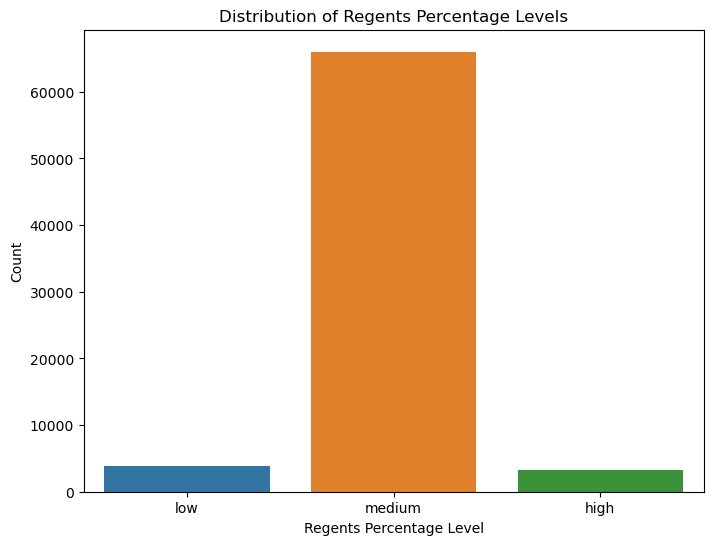

In [19]:
# Distribution of 'reg_pct_level'
plt.figure(figsize=(8, 6))
sns.countplot(x='reg_pct_level', data=data)
plt.title('Distribution of Regents Percentage Levels')
plt.xlabel('Regents Percentage Level')
plt.ylabel('Count')
plt.show()

### Inference
The distribution of 'reg_pct_level' indicates the frequency of observations falling into each category of regents percentage levels ('low', 'medium', 'high'). From the count plot:

- The majority of observations fall into the 'medium' category, indicating that a significant proportion of school districts/student subgroupings have regents percentage levels within the medium range.
- The 'low' category has fewer observations compared to the 'medium' category, suggesting that a smaller proportion of school districts/student subgroupings have regents percentage levels below half of the median percentage.
- The 'high' category has the fewest observations, indicating that the smallest proportion of school districts/student subgroupings have regents percentage levels exceeding 1.5 times the median percentage.

Overall, the distribution suggests that the regents percentage levels vary across school districts/student subgroupings, with the majority falling within the medium range, followed by low and high ranges. This information will be important for understanding the distribution of the target variable and its potential impact on model training and prediction.

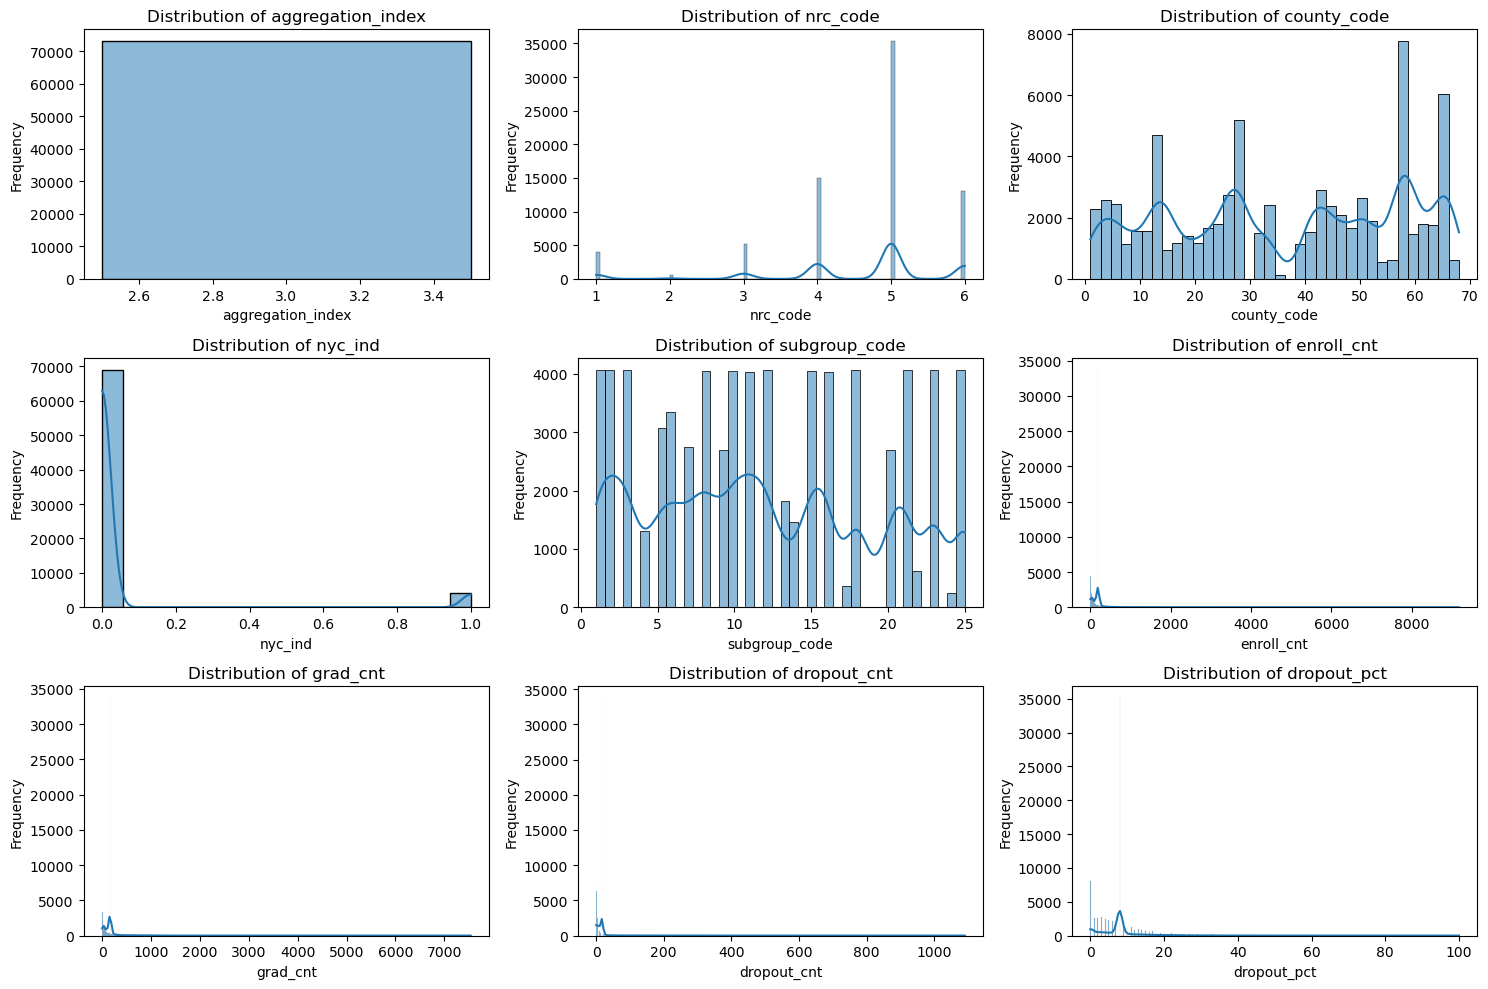

In [20]:
# Numeric variables distribution
plt.figure(figsize=(15, 10))

# Plot histograms for numerical variables
for i, col in enumerate(numeric_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Inference
The histograms above display the distribution of each numerical variable in the dataset. Here are some inferences drawn from these visualizations:

1. **aggregation_index**: Since this variable has a constant value of 3, all observations have the same value, indicating that it may not be informative for modeling and can be considered for removal.

2. **nrc_code**: The distribution of 'nrc_code' shows that most observations fall into categories 4 and 5, with fewer observations in categories 1, 2, 3, and 6. This suggests that categories 4 and 5 are more prevalent in the dataset.

3. **county_code**: The distribution of 'county_code' indicates variability across different counties, with some counties having a higher frequency of observations compared to others.

4. **nyc_ind**: The majority of observations have a value of 0 for 'nyc_ind', indicating that most school districts are not located within the borders of New York City.

5. **subgroup_code**: There is variability in the distribution of 'subgroup_code', with some subgroupings being more prevalent than others.

6. **enroll_cnt**, **grad_cnt**, **dropout_cnt**: These variables show right-skewed distributions, with most observations concentrated at lower values and a few observations with extremely high values. This suggests potential outliers in the data, which may need to be addressed during data preprocessing.

7. **dropout_pct**: The distribution of 'dropout_pct' is also right-skewed, indicating that the majority of observations have lower dropout percentages, with a long tail towards higher percentages.

Overall, these visualizations provide insights into the distributions of numerical variables, highlighting potential patterns, variabilities, and outliers in the data. Further analysis and preprocessing may be required to address any issues identified during EDA.

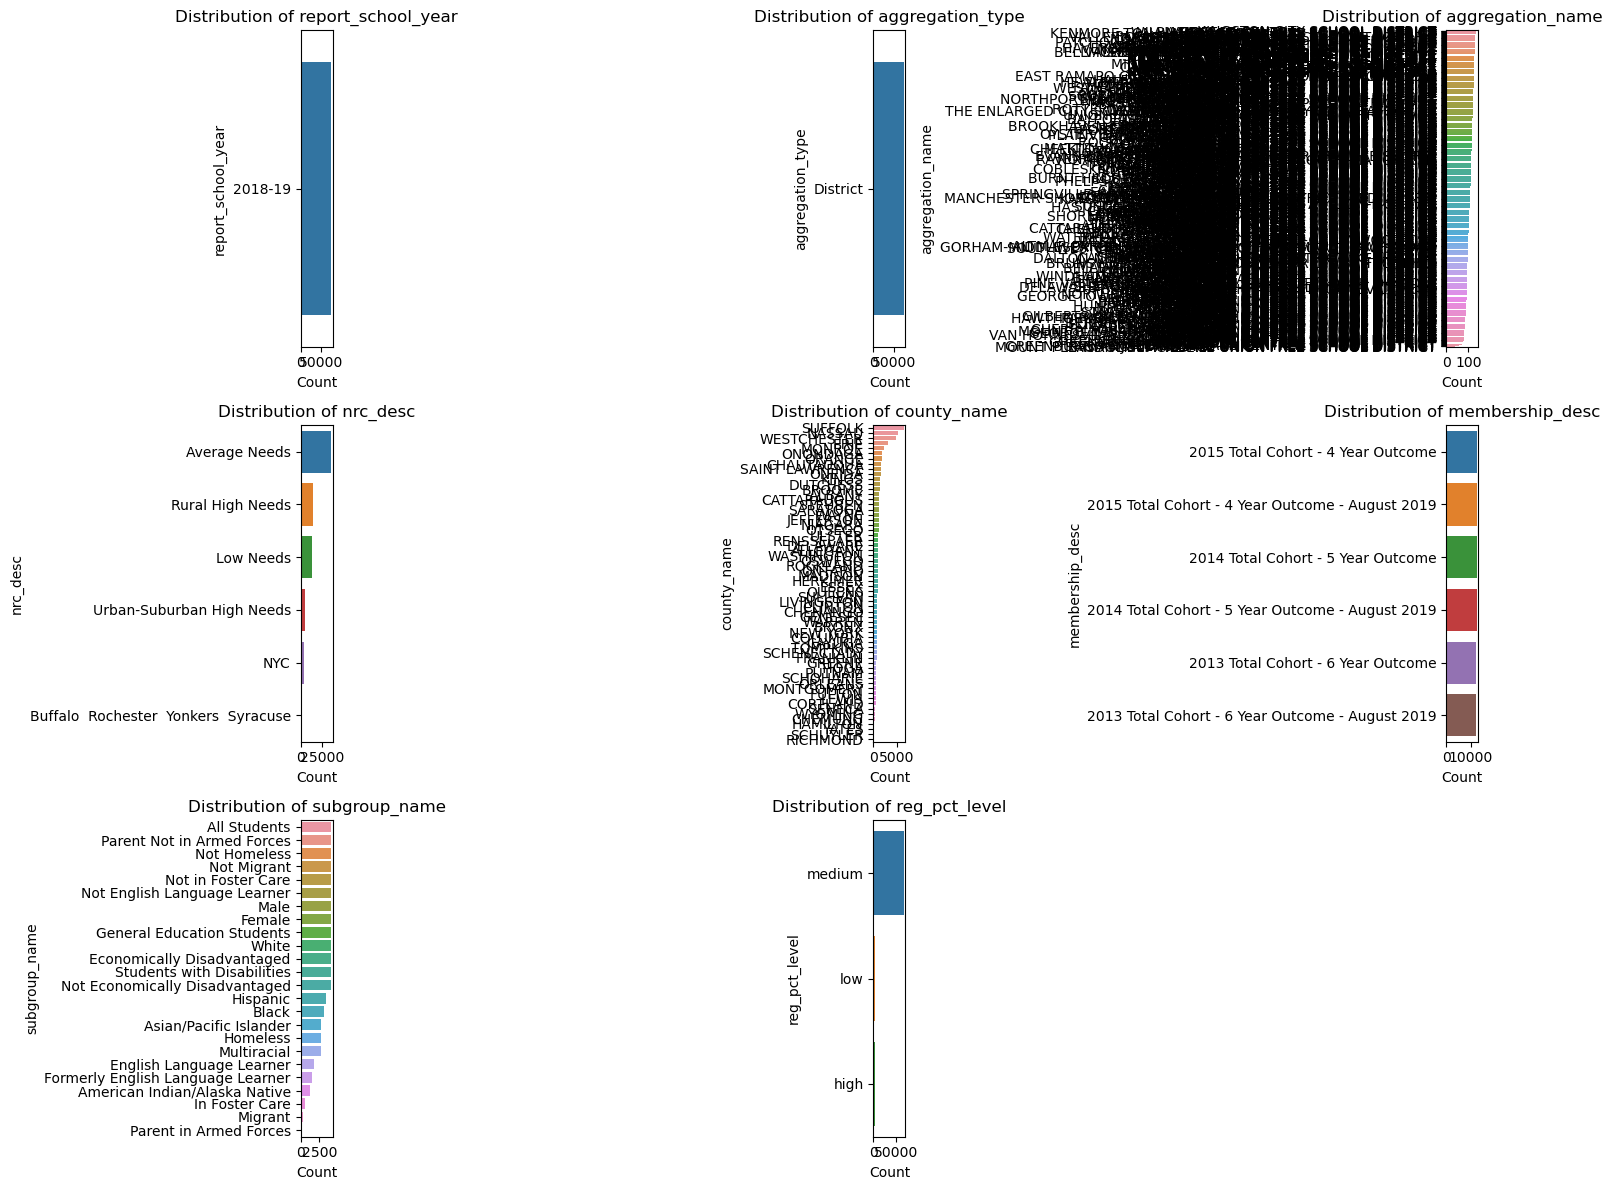

In [21]:
# Categorical variables distribution
plt.figure(figsize=(15, 12))

# Plot countplots for categorical variables
for i, col in enumerate(categorical_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Inference
The countplots above illustrate the distribution of each categorical variable in the dataset. Here are some inferences drawn from these visualizations:

1. **report_school_year**: All observations belong to the school year '2018-19', indicating that the dataset covers a single academic year.

2. **aggregation_type**: The aggregation type is consistent across all observations, with all data aggregated at the district level.

3. **aggregation_name**: The distribution of 'aggregation_name' shows the frequency of different district names in the dataset. Some district names appear more frequently than others, indicating variability in the representation of districts.

4. **nrc_desc**: The majority of observations have 'Average Needs' according to the 'nrc_desc' variable, followed by other categories such as 'Low Needs' and 'High Needs'.

5. **county_name**: There is variability in the distribution of 'county_name', with some counties having a higher frequency of observations compared to others.

6. **membership_desc**: The 'membership_desc' variable describes different cohort outcomes, with '2015 Total Cohort - 4 Year Outcome' being the most frequent description.

7. **subgroup_name**: The distribution of 'subgroup_name' illustrates the frequency of different student subgroup names in the dataset. 'All Students' is the most common subgroup, followed by other categories such as 'Special Education' and 'Economically Disadvantaged'.

These visualizations provide insights into the distribution of categorical variables, highlighting the prevalence of different categories within each variable. Understanding these distributions is essential for identifying potential patterns and relationships between categorical variables and the target variable. Further analysis and modeling may involve encoding categorical variables and examining their impact on the target variable.

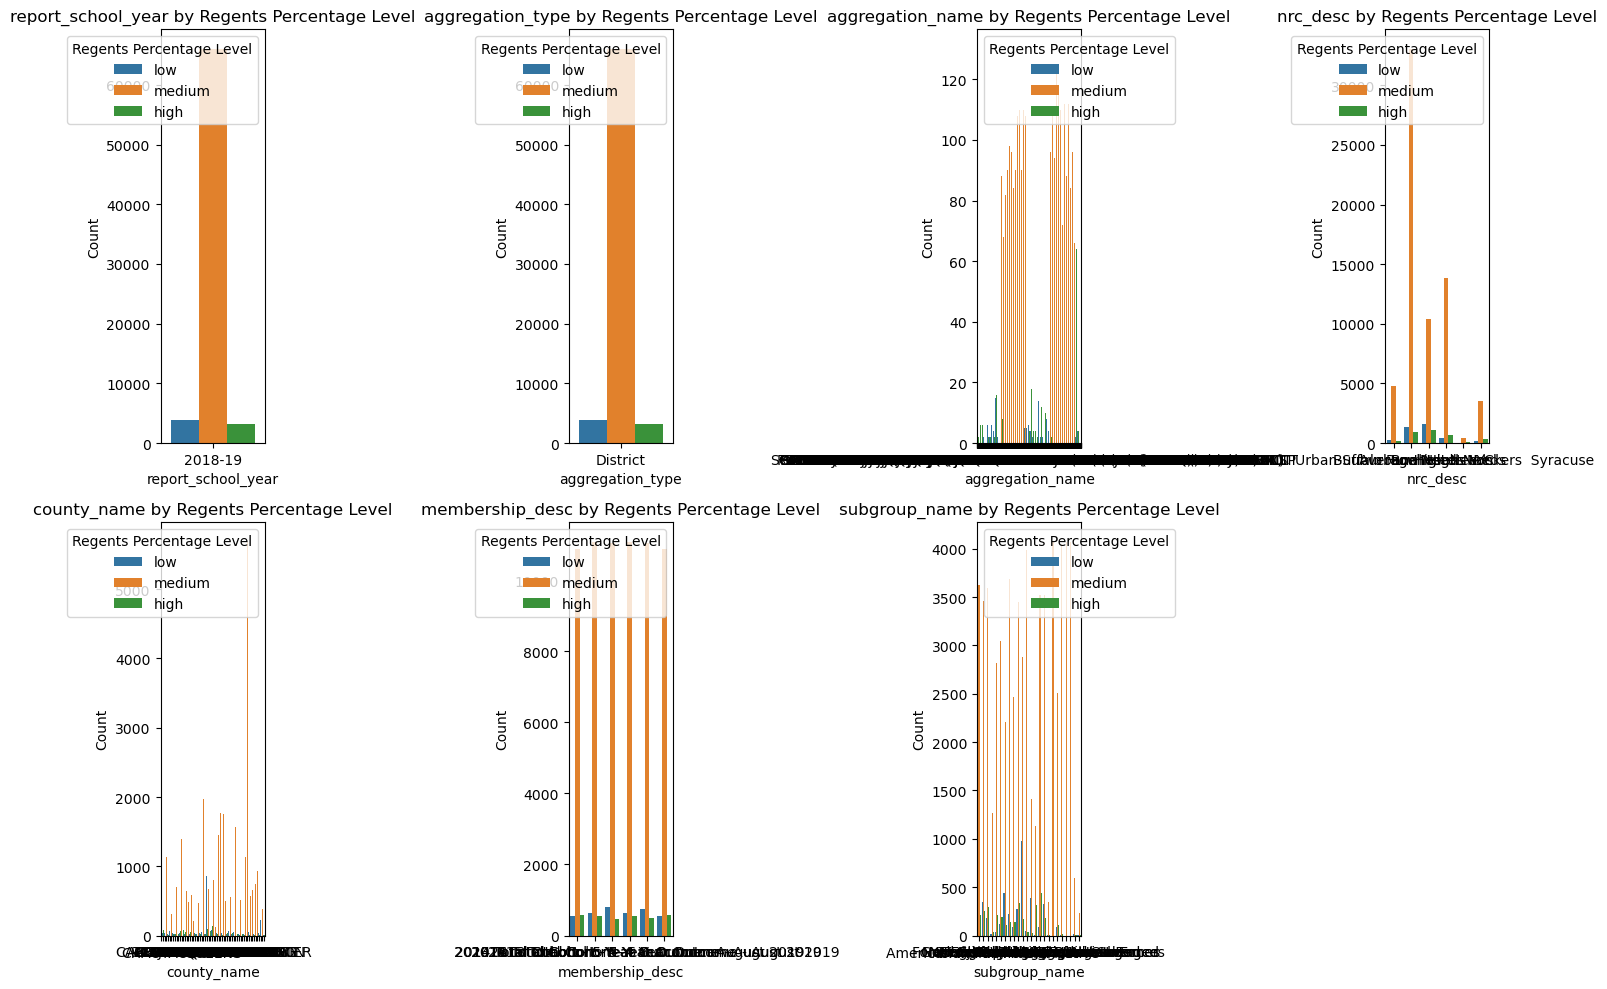

In [22]:
# Relationship between categorical variables and 'reg_pct_level'
plt.figure(figsize=(15, 10))

# Plot countplots for categorical variables with 'reg_pct_level'
for i, col in enumerate(categorical_data.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=col, hue='reg_pct_level', data=data)
    plt.title(f'{col} by Regents Percentage Level')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Regents Percentage Level')

plt.tight_layout()
plt.show()


### Inference
The countplots above illustrate the relationship between each categorical variable and the 'reg_pct_level' variable. Here are some inferences drawn from these visualizations:

1. **report_school_year by Regents Percentage Level**: All observations belong to the school year '2018-19' across all regents percentage levels, indicating that the distribution of regents percentage levels remains consistent across school years.

2. **aggregation_type by Regents Percentage Level**: The distribution of regents percentage levels varies slightly across different aggregation types, with some differences in the proportions of low, medium, and high regents percentage levels.

3. **aggregation_name by Regents Percentage Level**: Different district names exhibit varying distributions of regents percentage levels. Some districts have a higher proportion of low or high regents percentage levels compared to others.

4. **nrc_desc by Regents Percentage Level**: The distribution of regents percentage levels differs across needs categories. Some needs categories have higher proportions of low or high regents percentage levels compared to others.

5. **county_name by Regents Percentage Level**: Counties show variability in the distribution of regents percentage levels, with some counties having a higher proportion of low or high regents percentage levels compared to others.

6. **membership_desc by Regents Percentage Level**: Different cohort outcomes exhibit varying distributions of regents percentage levels. Some cohort outcomes have higher proportions of low or high regents percentage levels compared to others.

7. **subgroup_name by Regents Percentage Level**: Student subgroups show variability in the distribution of regents percentage levels. Some subgroups have higher proportions of low or high regents percentage levels compared to others.

These visualizations provide insights into how different categorical variables are related to the 'reg_pct_level' variable. Understanding these relationships is crucial for identifying potential predictors of regents percentage levels and informing predictive modeling efforts. Further analysis may involve exploring these relationships in more detail and selecting relevant features for modeling.

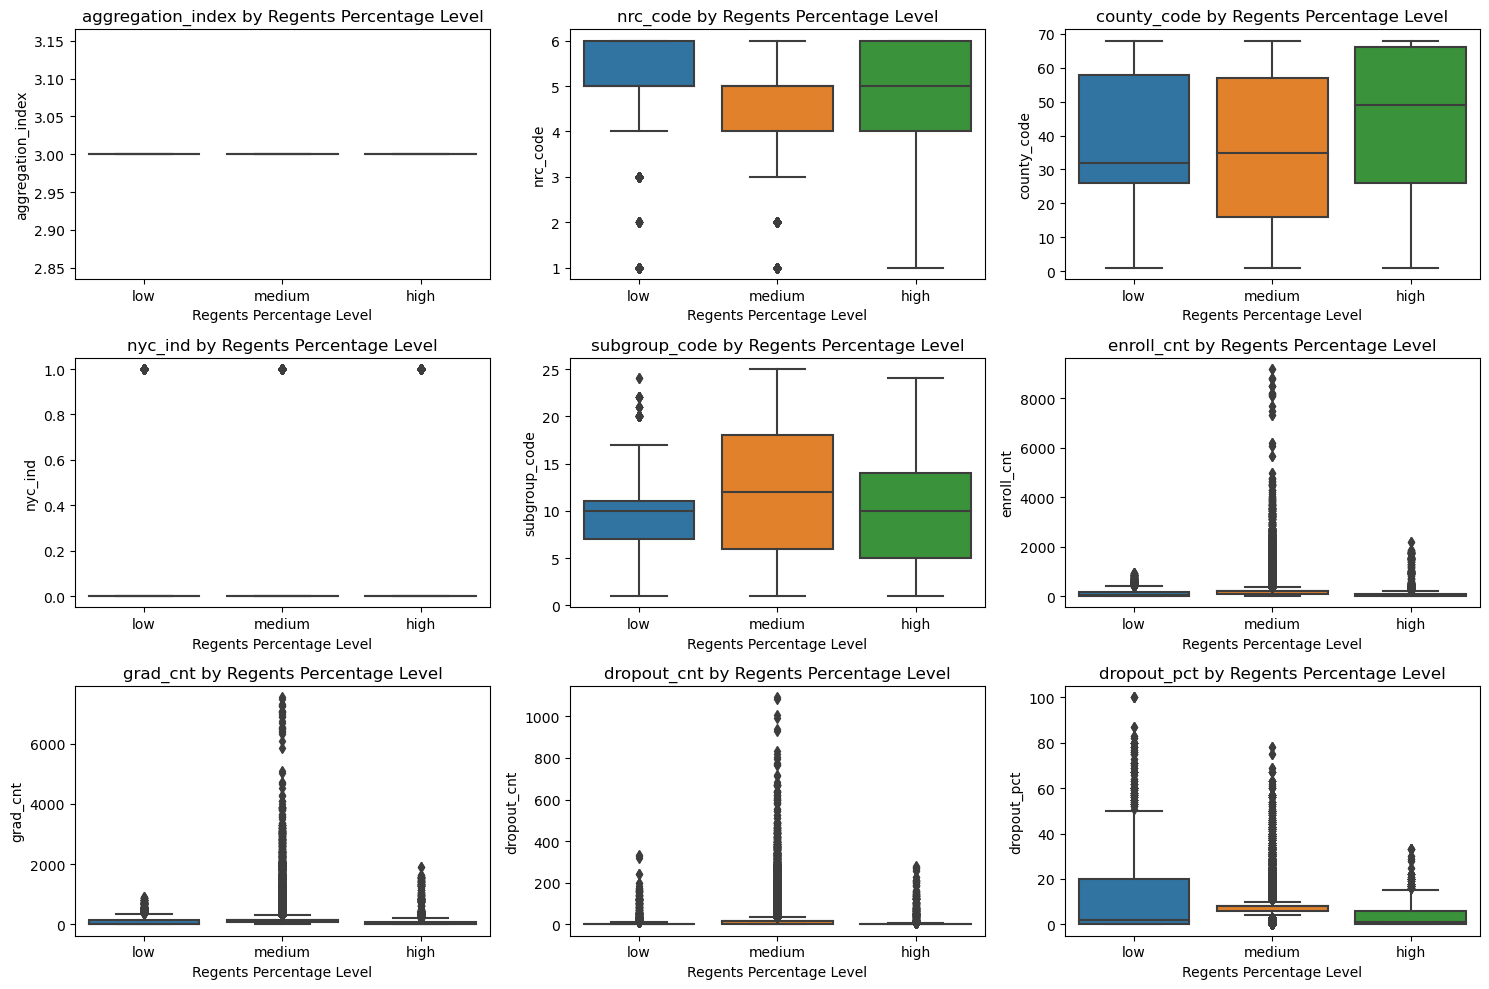

In [23]:
# Relationship between numerical variables and 'reg_pct_level'
plt.figure(figsize=(15, 10))

# Plot boxplots for numerical variables with 'reg_pct_level'
for i, col in enumerate(numeric_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='reg_pct_level', y=col, data=data)
    plt.title(f'{col} by Regents Percentage Level')
    plt.xlabel('Regents Percentage Level')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Inference

The boxplots above illustrate the relationship between each numerical variable and the 'reg_pct_level' variable. Here are some inferences drawn from these visualizations:

1. **aggregation_index by Regents Percentage Level**: The aggregation index does not appear to have a significant impact on regents percentage levels, as the distribution of aggregation index values is similar across low, medium, and high regents percentage levels.

2. **nrc_code by Regents Percentage Level**: There is variability in nrc_code values across different regents percentage levels, indicating that certain categories of nrc_code may be associated with higher or lower regents percentage levels.

3. **county_code by Regents Percentage Level**: Similar to nrc_code, county_code values vary across different regents percentage levels, suggesting that certain counties may have higher or lower regents percentage levels.

4. **nyc_ind by Regents Percentage Level**: The binary indicator for NYC district affiliation (nyc_ind) does not show a clear distinction in regents percentage levels between NYC and non-NYC districts.

5. **subgroup_code by Regents Percentage Level**: Similar to aggregation_index, subgroup_code does not exhibit a significant difference in regents percentage levels across different subgroup codes.

6. **enroll_cnt by Regents Percentage Level**: There are variations in enrollment counts across different regents percentage levels, with potentially higher enrollment counts associated with higher regents percentage levels.

7. **grad_cnt by Regents Percentage Level**: Graduation counts vary across different regents percentage levels, with potentially higher graduation counts associated with higher regents percentage levels.

8. **dropout_cnt by Regents Percentage Level**: Dropout counts also show variations across different regents percentage levels, with potentially lower dropout counts associated with higher regents percentage levels.

9. **dropout_pct by Regents Percentage Level**: Dropout percentages exhibit variations across different regents percentage levels, with potentially lower dropout percentages associated with higher regents percentage levels.

Overall, these visualizations provide insights into how different numerical variables are related to the 'reg_pct_level' variable. Understanding these relationships can help identify potential predictors of regents percentage levels and guide further analysis and modeling efforts.

In [24]:
# Define numerical columns
numerical_cols = ['enroll_cnt', 'grad_cnt', 'dropout_cnt', 'dropout_pct']

# Convert object columns to appropriate data types
object_cols = ['report_school_year', 'aggregation_type', 'aggregation_name', 'nrc_desc', 
               'county_name', 'membership_desc', 'subgroup_name']
data[object_cols] = data[object_cols].astype('category')

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(data[object_cols]))
encoded_cols.columns = encoder.get_feature_names(object_cols)

# Concatenate encoded categorical columns with the original dataframe
data_encoded = pd.concat([data, encoded_cols], axis=1)

# Remove original categorical columns from the dataframe
data_encoded.drop(object_cols, axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
print(data_encoded.head())


C:\Users\mridu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   aggregation_index  nrc_code  county_code  nyc_ind  subgroup_code  \
0                  3         3            1        0              1   
1                  3         3            1        0              2   
2                  3         3            1        0              3   
3                  3         3            1        0              4   
4                  3         3            1        0              5   

   enroll_cnt    grad_cnt   grad_pct  dropout_cnt  dropout_pct  ...  \
0  658.000000  464.000000  71.000000   148.000000    22.000000  ...   
1  324.000000  246.000000  76.000000    65.000000    20.000000  ...   
2  334.000000  218.000000  65.000000    83.000000    25.000000  ...   
3  192.120079  161.178354  84.406614    16.239225     7.963049  ...   
4  367.000000  248.000000  68.000000    91.000000    25.000000  ...   

  subgroup_name_Multiracial  subgroup_name_Not Economically Disadvantaged  \
0                       0.0                                          

# Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the number of features to select
num_features = 10

# Separate features and target variable
X = data_encoded.drop('reg_pct_level', axis=1)
y = data_encoded['reg_pct_level']

# Perform ANOVA F-test for numerical variables
numerical_features = X.select_dtypes(include=['float64'])
anova_selector = SelectKBest(score_func=f_classif, k=num_features)
selected_features = anova_selector.fit_transform(numerical_features, y)

# Get selected feature indices
selected_feature_indices = anova_selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = numerical_features.columns[selected_feature_indices]

# Display selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['grad_pct', 'dropout_pct',
       'aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT',
       'aggregation_name_SCARSDALE UNION FREE SCHOOL DISTRICT',
       'nrc_desc_Low Needs', 'county_name_NASSAU', 'county_name_WESTCHESTER',
       'subgroup_name_English Language Learner',
       'subgroup_name_Formerly English Language Learner',
       'subgroup_name_Students with Disabilities'],
      dtype='object')


### Inference:

The selected features include a mix of numerical and categorical variables.
Numerical features such as graduation percentage and dropout percentage are important for predicting the level of regents diploma awards.
Categorical features related to school districts, needs categories, counties, and student subgroups also play a significant role in predicting the target variable.
These selected features provide valuable insights into the factors that may influence the level of regents diploma awards in high school graduation data.

# Model Creation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model 1 with selected features grad_pct, dropout_pct, nrc_desc_Low Needs, county_name_NASSAU
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_train[['grad_pct', 'dropout_pct', 'nrc_desc_Low Needs', 'county_name_NASSAU']], y_train)

# Decision Tree Model 2 with selected features grad_pct, aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT, subgroup_name_English Language Learner, subgroup_name_Students with Disabilities
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(X_train[['grad_pct', 'aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT', 'subgroup_name_English Language Learner', 'subgroup_name_Students with Disabilities']], y_train)

# Random Forest Model 1 with selected features grad_pct, dropout_pct, nrc_desc_Low Needs, county_name_NASSAU
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train[['grad_pct', 'dropout_pct', 'nrc_desc_Low Needs', 'county_name_NASSAU']], y_train)

# Random Forest Model 2 with selected features grad_pct, aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT, subgroup_name_English Language Learner, subgroup_name_Students with Disabilities
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train[['grad_pct', 'aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT', 'subgroup_name_English Language Learner', 'subgroup_name_Students with Disabilities']], y_train)


RandomForestClassifier(random_state=42)

# Model evaluation

In [28]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print performance metrics
def evaluate_model(model, X, y):
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation of Accuracy:", scores.std())

# Evaluate Decision Tree Model 1
print("\nDecision Tree Model 1:")
evaluate_model(dt_model1, X_train[['grad_pct', 'dropout_pct', 'nrc_desc_Low Needs', 'county_name_NASSAU']], y_train)

# Evaluate Decision Tree Model 2
print("\nDecision Tree Model 2:")
evaluate_model(dt_model2, X_train[['grad_pct', 'aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT', 'subgroup_name_English Language Learner', 'subgroup_name_Students with Disabilities']], y_train)

# Evaluate Random Forest Model 1
print("\nRandom Forest Model 1:")
evaluate_model(rf_model1, X_train[['grad_pct', 'dropout_pct', 'nrc_desc_Low Needs', 'county_name_NASSAU']], y_train)

# Evaluate Random Forest Model 2
print("\nRandom Forest Model 2:")
evaluate_model(rf_model2, X_train[['grad_pct', 'aggregation_name_CHAPPAQUA CENTRAL SCHOOL DISTRICT', 'subgroup_name_English Language Learner', 'subgroup_name_Students with Disabilities']], y_train)



Decision Tree Model 1:
Cross-Validation Scores: [0.90926954 0.90789474 0.90857826 0.91079973 0.90917635]
Mean Accuracy: 0.9091437240337845
Standard Deviation of Accuracy: 0.0009632189308614162

Decision Tree Model 2:
Cross-Validation Scores: [0.91063648 0.91233766 0.91267943 0.91148325 0.9105434 ]
Mean Accuracy: 0.91153604517293
Standard Deviation of Accuracy: 0.0008657078256616259

Random Forest Model 1:
Cross-Validation Scores: [0.91038018 0.90985988 0.9101162  0.91233766 0.91045796]
Mean Accuracy: 0.9106303762785475
Standard Deviation of Accuracy: 0.0008792266291797484

Random Forest Model 2:
Cross-Validation Scores: [0.91038018 0.91208134 0.91276487 0.91182502 0.91028708]
Mean Accuracy: 0.91146769685271
Standard Deviation of Accuracy: 0.0009760565692254268


Based on the cross-validation results:

1. **Decision Tree Model 1** achieved a mean accuracy of approximately 90.91% with a standard deviation of 0.00096.
2. **Decision Tree Model 2** achieved a slightly higher mean accuracy of approximately 91.15% with a standard deviation of 0.00087.
3. **Random Forest Model 1** achieved a mean accuracy of around 91.06% with a standard deviation of 0.00088.
4. **Random Forest Model 2** achieved a mean accuracy of approximately 91.15% with a standard deviation of 0.00098.

In terms of mean accuracy, both Decision Tree Model 2 and Random Forest Model 2 performed slightly better than their counterparts. However, the differences in accuracy between the models are very small.

**Inference and Conclusion:**

1. **Model Selection:** Decision Tree Model 2 and Random Forest Model 2 demonstrate slightly better performance in terms of mean accuracy compared to their counterparts. Therefore, we may prefer these models for their slightly higher accuracy.

2. **Interpretability:** Decision tree models are more interpretable compared to random forest models. If interpretability is a priority, Decision Tree Model 2 might be a better choice.

3. **Complexity:** Random forest models tend to be more complex due to the ensemble nature. If simplicity is preferred, Decision Tree Model 2 might be preferred.

4. **Generalization:** While cross-validation provides insights into model performance on training data, applying the preferred model (in this case, Decision Tree Model 2 or Random Forest Model 2) to the testing subset will validate its performance on unseen data. This step is crucial to ensure the generalization ability of the model.

Overall, the choice between Decision Tree Model 2 and Random Forest Model 2 depends on the specific requirements of the application, such as the importance of interpretability, simplicity, and the need for slightly higher accuracy.